In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Data Extraction*

In [138]:
Customer = pd.read_csv("/content/drive/MyDrive/datasets/Customer.csv")
Product = pd.read_csv("/content/drive/MyDrive/datasets/Product.csv")
Order = pd.read_csv("/content/drive/MyDrive/datasets/Order.csv")

Task 1

*Data Exploration*

1.a

In [139]:
Customer_data_points = len(Customer)
Product_data_points = len(Product)
Order_data_points = len(Order)

In [140]:
Customer_data_points

600

In [141]:
Product_data_points

600

In [142]:
Order_data_points

600

1.b

In [143]:
Customer_attributes = list(Customer.columns)
Product_attributes = list(Product.columns)
Order_attributes = list(Order.columns)

In [144]:
Customer_attributes

['Row_ID',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal_Code',
 'Region']

In [145]:
Product_attributes

['Row_ID', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales']

In [146]:
Order_attributes

['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Status']

1.c

In [147]:
Att_type_customer = Customer.dtypes
Att_type_product = Product.dtypes
Att_type_order = Order.dtypes

In [148]:
Att_type_customer

,0
Row_ID,int64
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object
State,object
Postal_Code,int64
Region,object


In [149]:
Att_type_product

,0
Row_ID,int64
Product_ID,object
Category,object
Sub_Category,object
Product_Name,object
Sales,float64


In [150]:
Att_type_order

,0
Row_ID,int64
Order_ID,object
Order_Date,object
Ship_Date,object
Ship_Mode,object
Status,object


1.d

In [151]:
Customer_missing_values  = Customer.isnull().sum()
Product_missing_values  = Product.isnull().sum()
Order_missing_values  = Order.isnull().sum()

In [152]:
Customer_missing_values

,0
Row_ID,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0
State,0
Postal_Code,0
Region,0


In [153]:
Product_missing_values

,0
Row_ID,0
Product_ID,0
Category,0
Sub_Category,0
Product_Name,0
Sales,0


In [154]:
Order_missing_values

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Status,338


1.e

In [155]:
Missing_values_error_customer  = Customer.isnull().sum()
MissingValues_error_product   = Product.isnull().sum()
MissingValues_error_order   = Order.isnull().sum()

In [156]:
Missing_values_error_customer

,0
Row_ID,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0
State,0
Postal_Code,0
Region,0


In [157]:
print(Customer['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana']


In [158]:
print(Customer['Region'].unique())

['South' 'West' 'Central' 'East']


In [159]:
print(Customer['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


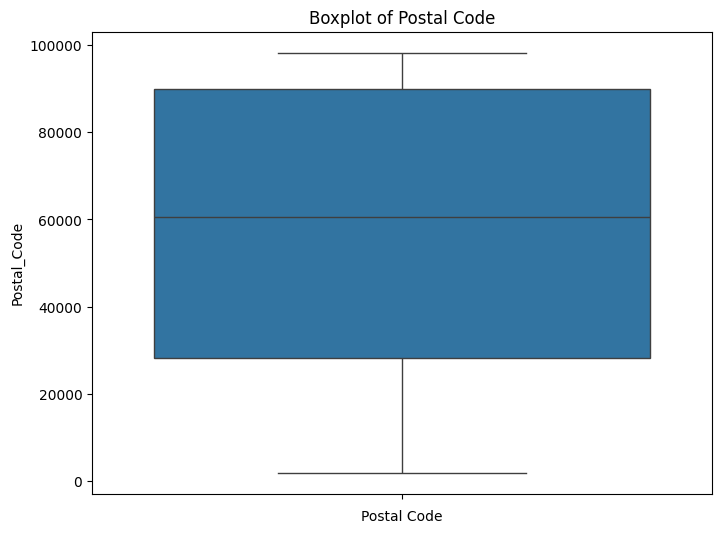

In [160]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Customer, y='Postal_Code')
plt.title('Boxplot of Postal Code')
plt.xlabel('Postal Code')
plt.show()


In [161]:
MissingValues_error_product

,0
Row_ID,0
Product_ID,0
Category,0
Sub_Category,0
Product_Name,0
Sales,0


In [162]:
print(Product['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [163]:
print(Product['Sub_Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [164]:
MissingValues_error_order

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Status,338


In [165]:
print(Order['Ship_Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [166]:
print(Order['Status'].unique())

['Shipped' nan 'Canceled' 'Pending']


1.f

Text(0.5, 1.0, 'Customer - Heatmap for missing values')

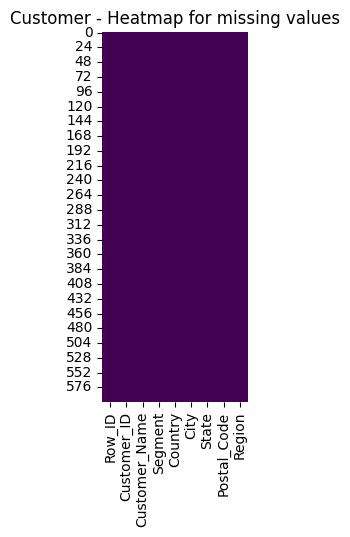

In [167]:
plt.subplot(1, 3, 1)
sns.heatmap(Customer.isnull(), cbar=False, cmap='viridis')
plt.title('Customer - Heatmap for missing values')

Text(0.5, 1.0, 'Product - Heatmap for missing values')

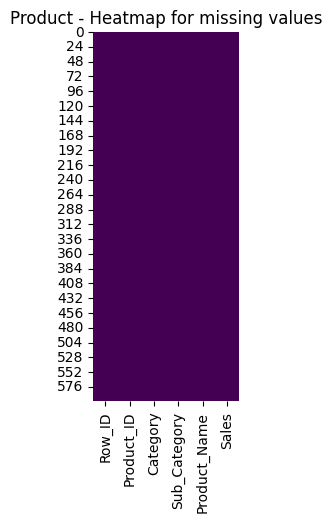

In [168]:
plt.subplot(1, 3, 2)
sns.heatmap(Product.isnull(), cbar=False, cmap='viridis')
plt.title('Product - Heatmap for missing values')

Text(0.5, 1.0, 'Order - Heatmap for missing values')

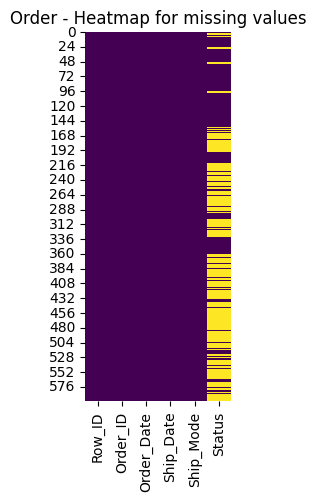

In [169]:
plt.subplot(1, 3, 3)
sns.heatmap(Order.isnull(), cbar=False, cmap='viridis')
plt.title('Order - Heatmap for missing values')

**Task 2**

*Data Transformation*

2.1

In [170]:
# Integrating data from multiple CSV files of the initial data source into a single dataset
common_attribute = 'Row_ID'
Integrated_dataset = pd.merge(Customer, Product, on=common_attribute, how= 'inner')
Integrated_dataset = pd.merge(Integrated_dataset, Order, on=common_attribute, how= 'inner')

In [171]:
Integrated_dataset

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode,Status
0,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,24.100,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Shipped
1,2,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",33.110,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Shipped
2,3,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,44.020,CA-2017-138688,12/6/2017,16/06/2017,Second Class,NaN
3,4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2309.650,US-2016-108966,11/10/2016,18/10/2016,Standard Class,NaN
4,5,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,1090.782,US-2016-108966,11/10/2016,18/10/2016,Standard Class,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,NaN
596,597,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-PH-10002398,Technology,Phones,AT&T 1070 Corded Phone,445.960,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,NaN
597,598,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,FUR-FU-10001979,Furniture,Furnishings,Dana Halogen Swing-Arm Architect Lamp,327.760,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,NaN
598,599,TP-21130,Theone Pippenger,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,11.632,CA-2017-120180,14/07/2017,16/07/2017,First Class,NaN


2.2.a

In [172]:
# Removing columns of redundant features.
Customer_missing_values_percentage = (Customer.isnull().sum() / len(Customer)) *100
Customer_missing_values_percentage

,0
Row_ID,0.0
Customer_ID,0.0
Customer_Name,0.0
Segment,0.0
Country,0.0
City,0.0
State,0.0
Postal_Code,0.0
Region,0.0


In [173]:
Product_missing_values_percentage = (Product.isnull().sum() / len(Customer)) *100
Product_missing_values_percentage

,0
Row_ID,0.0
Product_ID,0.0
Category,0.0
Sub_Category,0.0
Product_Name,0.0
Sales,0.0


In [174]:
Order_missing_values_percentage = (Order.isnull().sum() / len(Customer)) *100
Order_missing_values_percentage

,0
Row_ID,0.000000
Order_ID,0.000000
Order_Date,0.000000
Ship_Date,0.000000
Ship_Mode,0.000000
Status,56.333333


In [175]:
#Dropping colums having more than 50% missing values
Store_dataset = Integrated_dataset.drop(['Status'], axis=1)
Store_dataset

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode
0,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,24.100,CA-2017-152156,8/11/2017,11/11/2017,Second Class
1,2,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",33.110,CA-2017-152156,8/11/2017,11/11/2017,Second Class
2,3,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,44.020,CA-2017-138688,12/6/2017,16/06/2017,Second Class
3,4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2309.650,US-2016-108966,11/10/2016,18/10/2016,Standard Class
4,5,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,1090.782,US-2016-108966,11/10/2016,18/10/2016,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,CA-2015-131450,8/8/2015,15/08/2015,Standard Class
596,597,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-PH-10002398,Technology,Phones,AT&T 1070 Corded Phone,445.960,CA-2015-131450,8/8/2015,15/08/2015,Standard Class
597,598,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,FUR-FU-10001979,Furniture,Furnishings,Dana Halogen Swing-Arm Architect Lamp,327.760,CA-2015-131450,8/8/2015,15/08/2015,Standard Class
598,599,TP-21130,Theone Pippenger,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,11.632,CA-2017-120180,14/07/2017,16/07/2017,First Class


2.2.c

In [176]:
# Filtering data

Filtered_Data_Home_Office = Store_dataset[Integrated_dataset['Segment'] == 'Home Office']
Filtered_Data_Home_Office

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode
14,15,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,14.030,US-2016-118983,22/11/2016,26/11/2016,Standard Class
15,16,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,1618.370,US-2016-118983,22/11/2016,26/11/2016,Standard Class
34,35,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,14.400,CA-2018-107727,19/10/2018,23/10/2018,Second Class
37,38,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,#10-4 1/8 x 9 1/2 Premium Diagonal Seam Envelopes,14.427,CA-2016-117415,27/12/2016,31/12/2016,Standard Class
38,39,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",86.620,CA-2016-117415,27/12/2016,31/12/2016,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,527,PH-18790,Patricia Hirasaki,Home Office,United States,Lakeland,Florida,33801,South,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,683.952,CA-2018-113558,21/10/2018,26/10/2018,Standard Class
527,528,PH-18790,Patricia Hirasaki,Home Office,United States,Lakeland,Florida,33801,South,FUR-FU-10001756,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Photo F...",45.696,CA-2018-113558,21/10/2018,26/10/2018,Standard Class
537,538,MP-17470,Mark Packer,Home Office,United States,New York City,New York,10009,East,OFF-BI-10004528,Office Supplies,Binders,Cardinal Poly Pocket Divider Pockets for Ring ...,10.752,CA-2016-147851,3/12/2016,8/12/2016,Standard Class
546,547,AS-10135,Adrian Shami,Home Office,United States,New York City,New York,10035,East,OFF-BI-10000404,Office Supplies,Binders,Avery Printable Repositionable Plastic Tabs,41.280,CA-2018-162929,19/11/2018,22/11/2018,First Class


In [177]:
Filtered_Data_Binders = Store_dataset[Integrated_dataset['Sub_Category'] == 'Binders']
Filtered_Data_Binders

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode
8,9,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,7.080,CA-2015-115812,9/6/2015,14/06/2015,Standard Class
13,14,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,155.250,CA-2017-161389,5/12/2017,10/12/2017,Standard Class
15,16,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,1618.370,US-2016-118983,22/11/2016,26/11/2016,Standard Class
20,21,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1",124.950,CA-2015-143336,27/08/2015,1/9/2015,Second Class
25,26,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,OFF-BI-10001634,Office Supplies,Binders,Wilson Jones Active Use Binders,6.208,CA-2017-121755,16/01/2017,20/01/2017,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,561,LP-17080,Liz Pelletier,Consumer,United States,San Francisco,California,94110,West,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",84.056,CA-2018-118731,20/11/2018,22/11/2018,Second Class
567,568,EB-13840,Ellis Ballard,Corporate,United States,Seattle,Washington,98105,West,OFF-BI-10001107,Office Supplies,Binders,"GBC White Gloss Covers, Plain Front",81.088,CA-2018-156951,1/10/2018,8/10/2018,Standard Class
572,573,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,OFF-BI-10001922,Office Supplies,Binders,Storex Dura Pro Binders,33.264,CA-2018-164826,28/12/2018,4/1/2019,Standard Class
584,585,DV-13465,Dianna Vittorini,Consumer,United States,Denver,Colorado,80219,West,OFF-BI-10002764,Office Supplies,Binders,Recycled Pressboard Report Cover with Reinforc...,6.783,CA-2018-145233,1/12/2018,5/12/2018,Standard Class


2.3.a

In [178]:
Encoded_data = pd.get_dummies(Store_dataset, columns=['Region'], prefix=['Region'])

In [179]:
Encoded_data

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Product_ID,Category,...,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode,Region_Central,Region_East,Region_South,Region_West
0,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,...,Bush Somerset Collection Bookcase,24.100,CA-2017-152156,8/11/2017,11/11/2017,Second Class,False,False,True,False
1,2,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",33.110,CA-2017-152156,8/11/2017,11/11/2017,Second Class,False,False,True,False
2,3,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,...,Self-Adhesive Address Labels for Typewriters b...,44.020,CA-2017-138688,12/6/2017,16/06/2017,Second Class,False,False,False,True
3,4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,...,Bretford CR4500 Series Slim Rectangular Table,2309.650,US-2016-108966,11/10/2016,18/10/2016,Standard Class,False,False,True,False
4,5,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,...,Eldon Fold N Roll Cart System,1090.782,US-2016-108966,11/10/2016,18/10/2016,Standard Class,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,TEC-CO-10004115,Technology,...,Sharp AL-1530CS Digital Copier,1199.976,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,False,False,False,True
596,597,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,TEC-PH-10002398,Technology,...,AT&T 1070 Corded Phone,445.960,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,False,False,False,True
597,598,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,FUR-FU-10001979,Furniture,...,Dana Halogen Swing-Arm Architect Lamp,327.760,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,False,False,False,True
598,599,TP-21130,Theone Pippenger,Consumer,United States,Philadelphia,Pennsylvania,19134,OFF-SU-10004115,Office Supplies,...,Acme Stainless Steel Office Snips,11.632,CA-2017-120180,14/07/2017,16/07/2017,First Class,False,True,False,False


2.3.c

In [180]:
# Aggregating purchase data

Average_spending_per_customer = Store_dataset.groupby('Customer_ID')['Sales'].mean().reset_index()
Average_spending_per_customer = Average_spending_per_customer.rename(columns={'Sales': 'Average_Spending'})
Average_spending_per_customer

,Customer_ID,Average_Spending
0,AA-10375,16.768000
1,AA-10480,151.720000
2,AB-10060,79.727800
3,AC-10420,288.835000
4,AD-10180,842.468000
...,...,...
233,VP-21730,342.370000
234,VW-21775,147.318200
235,XP-21865,25.920000
236,ZC-21910,33.177250


In [181]:
Total_purchase_per_customer = Store_dataset.groupby('Customer_ID')['Sales'].sum().reset_index()
Total_purchase_per_customer = Total_purchase_per_customer.rename(columns={'Sales': 'Total_Purchases'})
Total_purchase_per_customer

,Customer_ID,Total_Purchases
0,AA-10375,16.768
1,AA-10480,151.720
2,AB-10060,398.639
3,AC-10420,577.670
4,AD-10180,4212.340
...,...,...
233,VP-21730,342.370
234,VW-21775,736.591
235,XP-21865,25.920
236,ZC-21910,132.709


2.4

In [182]:
Store_dataset = pd.merge(Store_dataset, Average_spending_per_customer, on='Customer_ID', how='left')

In [183]:
Store_dataset = pd.merge(Store_dataset, Total_purchase_per_customer, on='Customer_ID', how='left')

In [184]:
Store_dataset

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode,Average_Spending,Total_Purchases
0,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,24.100,CA-2017-152156,8/11/2017,11/11/2017,Second Class,28.605,57.210
1,2,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",33.110,CA-2017-152156,8/11/2017,11/11/2017,Second Class,28.605,57.210
2,3,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,44.020,CA-2017-138688,12/6/2017,16/06/2017,Second Class,44.020,44.020
3,4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2309.650,US-2016-108966,11/10/2016,18/10/2016,Standard Class,1700.216,3400.432
4,5,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,1090.782,US-2016-108966,11/10/2016,18/10/2016,Standard Class,1700.216,3400.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
596,597,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-PH-10002398,Technology,Phones,AT&T 1070 Corded Phone,445.960,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
597,598,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,FUR-FU-10001979,Furniture,Furnishings,Dana Halogen Swing-Arm Architect Lamp,327.760,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
598,599,TP-21130,Theone Pippenger,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,11.632,CA-2017-120180,14/07/2017,16/07/2017,First Class,11.632,11.632


In [185]:
Store_datapoints = len(Store_dataset)
Store_attributes = list(Store_dataset.columns)
Store_att_type = Store_dataset.dtypes

In [186]:
Store_datapoints

600

In [187]:
Store_attributes

['Row_ID',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal_Code',
 'Region',
 'Product_ID',
 'Category',
 'Sub_Category',
 'Product_Name',
 'Sales',
 'Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Average_Spending',
 'Total_Purchases']

In [188]:
Store_att_type

,0
Row_ID,int64
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object
State,object
Postal_Code,int64
Region,object
Product_ID,object


In [190]:
#Calculating basic statistics for numerical and categorical features
#Sales is the only numerical feature where the basic statistics can be calculated

Numerical_statistics = Store_dataset[['Sales','Average_Spending','Total_Purchases']].describe()
Numerical_statistics

,Sales,Average_Spending,Total_Purchases
count,600.000000,600.000000,600.000000
mean,224.382289,224.382289,849.763738
std,512.768372,284.461615,1097.536469
min,1.080000,1.744000,1.744000
25%,15.552000,42.519950,132.709000
50%,46.990000,147.318200,437.763000
75%,195.783000,271.688800,1125.120000
max,6354.950000,1979.928000,6412.770000


In [191]:
#Calculating basic statistics for categorical features
Categorical_statistics = Store_dataset.describe(include=['object'])
Categorical_statistics

,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Order_ID,Order_Date,Ship_Date,Ship_Mode
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
unique,238,238,3,1,129,38,4,517,3,17,518,280,234,247,4
top,TB-21520,Tracy Blumstein,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Panasonic Kx-TS550,CA-2018-117457,1/12/2018,15/06/2017,Standard Class
freq,11,11,344,600,51,124,203,4,355,79,3,9,13,10,353


In [192]:
#Creating a meta data file
metadata = pd.DataFrame({
    'Property': ['Number of Data Points - Store_dataset','Name of Attributes - Store_dataset', 'Type of Attributes - Store_dataset', 'Numerical statistics','Categorical statistics'],
    'Value': [Store_datapoints, Store_attributes, Store_att_type, Numerical_statistics, Categorical_statistics]
})

In [193]:
#Saving the metadata to a file (e.g., CSV)
metadata.to_csv('metadata.csv', index=False)

Task 3

In [194]:
import sqlite3 as sq3

In [195]:
# connect to database
conn = sq3.connect('Store_data.db')
cur = conn.cursor()


In [196]:
Store_dataset.to_sql("Store_data", conn, if_exists = 'replace', index=False)

600

In [197]:
# print all data of the Customer table
df1 = pd.read_sql('SELECT * FROM Store_data', conn)
df1

,Row_ID,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_ID,Order_Date,Ship_Date,Ship_Mode,Average_Spending,Total_Purchases
0,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,24.100,CA-2017-152156,8/11/2017,11/11/2017,Second Class,28.605,57.210
1,2,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",33.110,CA-2017-152156,8/11/2017,11/11/2017,Second Class,28.605,57.210
2,3,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,44.020,CA-2017-138688,12/6/2017,16/06/2017,Second Class,44.020,44.020
3,4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2309.650,US-2016-108966,11/10/2016,18/10/2016,Standard Class,1700.216,3400.432
4,5,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,1090.782,US-2016-108966,11/10/2016,18/10/2016,Standard Class,1700.216,3400.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
596,597,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-PH-10002398,Technology,Phones,AT&T 1070 Corded Phone,445.960,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
597,598,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,FUR-FU-10001979,Furniture,Furnishings,Dana Halogen Swing-Arm Architect Lamp,327.760,CA-2015-131450,8/8/2015,15/08/2015,Standard Class,512.454,2049.816
598,599,TP-21130,Theone Pippenger,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,11.632,CA-2017-120180,14/07/2017,16/07/2017,First Class,11.632,11.632


In [198]:
conn.commit()
conn.close()